In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [4]:
import tensorflow as tf
gpu_device_name = tf.test.gpu_device_name()
print(gpu_device_name)


2023-11-24 22:11:17.461582: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [6]:
tf.config.list_physical_devices('GPU')

2023-11-24 22:11:18.139514: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


[]

In [7]:
# Prog3.1 
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/earvin/miniconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/earvin/miniconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths 

In [8]:
#print(train_data[0])
#print(train_labels[0])
print(max([max(sequence) for sequence in train_data]))

9999


In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(reverse_word_index.get(i-3, '?') for i in train_data[0])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [10]:
# prog 3.2
import numpy as np

def  vectiruze_sequences(sequences, dimension=10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1.
    return results

x_train = vectiruze_sequences(train_data)
x_test = vectiruze_sequences(test_data)

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
# prog 3.3
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


2023-11-24 22:11:29.656486: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
# prog 3.4
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [14]:
# prog 3.5
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [15]:
# prog 3.6
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,  
              metrics=[metrics.binary_accuracy])


In [16]:
# prog 3.7
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [17]:
# prog 3.8
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])  

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


2023-11-24 22:11:31.970865: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-11-24 22:11:31.979111: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1881595000 Hz


Epoch 1/20
30/30 [==============================] - 8s 208ms/step - loss: 0.5901 - acc: 0.6978 - val_loss: 0.3855 - val_acc: 0.8747
Epoch 2/20
30/30 [==============================] - 2s 53ms/step - loss: 0.3238 - acc: 0.9062 - val_loss: 0.3059 - val_acc: 0.8886
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.2298 - acc: 0.9293 - val_loss: 0.2780 - val_acc: 0.8913
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1702 - acc: 0.9484 - val_loss: 0.2813 - val_acc: 0.8876
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1420 - acc: 0.9569 - val_loss: 0.3067 - val_acc: 0.8782
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1175 - acc: 0.9639 - val_loss: 0.2976 - val_acc: 0.8868
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0920 - acc: 0.9734 - val_loss: 0.3289 - val_acc: 0.8777
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0769 - 

In [18]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


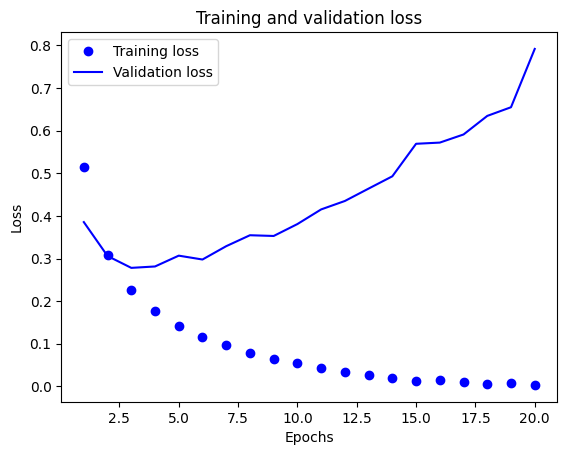

In [19]:
# prog 3.9
import matplotlib.pyplot as plt  #匯入 matplotlib.pyplot 模組, 後續程式用 plt 使用

history_dict = history.history
loss_values = history_dict['loss']  #取得每次訓練的 loss 訓練損失分數並存成 loss_values 變數
val_loss_values = history_dict['val_loss']  #取得每次驗證的 val_loss 驗證損失分數並指定給 val_loss_values 變數


epochs = range(1, len(loss_values)+ 1)  #len(loss_values) 項目個數為 20,範圍從 1 到 21 (不含 21) 的期間

plt.plot(epochs, loss_values, 'bo', label='Training loss')  #以 'b' 指定用藍色線條畫出 x 軸為訓練週期、y 軸為驗證損失分數的圖表, 標籤設為驗證損失分數
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  #以 'bo' 指定用藍色點點畫出 x 軸為訓練週期、y 軸為訓練損失分數的圖表, 標籤設為訓練損失分數
plt.title('Training and validation loss')
plt.xlabel('Epochs')  #將此圖表標題的 x 軸設為訓練週期分數
plt.ylabel('Loss')  #將此圖表標題的 y 軸設為損失
plt.legend()  #可以追加每個輸出圖表的圖像名稱

plt.show()  #顯示圖表

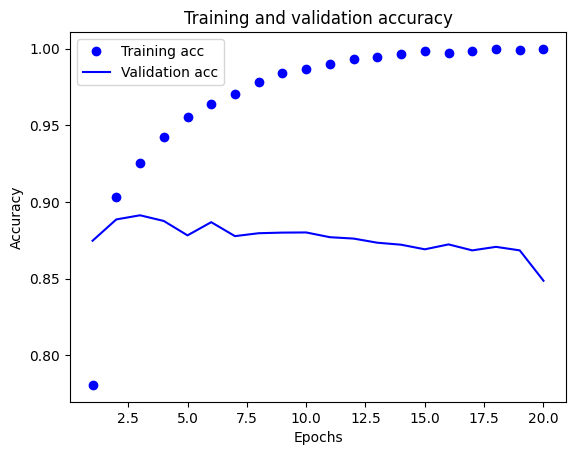

In [20]:
# prog 3.10
plt.clf()  #清除圖表
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# prog 3.11
model = models.Sequential()  #建立模型
model.add(layers.Dense(32, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)  #訓練 4 個週期的神經網路
results = model.evaluate(x_test, y_test)  #輸入測試資料與測試標籤進行評估

In [ ]:
results

In [ ]:
model.predict(x_test)

In [32]:
# prog 3.12
from keras.datasets import reuters  #從 keras.datasets 套件中匯入 reuters 資料集
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)


2110848/2110848 [==============================] - 3s 1us/step


In [36]:
print('train_data : ', len(train_data))
print(' test_data : ', len(test_data))

train_data :  8982
 test_data :  2246


In [37]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [38]:
# prog 3.14
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):  #使用 one-hot 編碼
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)  #向量化訓練資料
x_test = vectorize_sequences(test_data)  #向量化測試資料

In [39]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))  #把所有元素設為 0
    for i, label in enumerate(labels):
        results[i, label] = 1.   #第 i 個元素設為 1
    return results

one_hot_train_labels = to_one_hot(train_labels)  #向量化訓練標籤
one_hot_test_labels = to_one_hot(test_labels)  #向量化測試標籤

In [40]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [41]:
# prog 3.15
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [42]:
# prog 3.16
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
# prog 3.17
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [45]:
# prog 3.18
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 34ms/step - loss: 2.6375 - accuracy: 0.5239 - val_loss: 1.7706 - val_accuracy: 0.6250
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.4834 - accuracy: 0.6888 - val_loss: 1.3379 - val_accuracy: 0.7050
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 1.1339 - accuracy: 0.7543 - val_loss: 1.1610 - val_accuracy: 0.7360
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.9204 - accuracy: 0.8026 - val_loss: 1.0510 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.7622 - accuracy: 0.8314 - val_loss: 0.9960 - val_accuracy: 0.7740
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6252 - accuracy: 0.8587 - val_loss: 0.9578 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 0.5218 - accuracy: 0.8860 - val_loss: 0.9002 - val_accuracy: 0.8080
Epoch 8/20
16

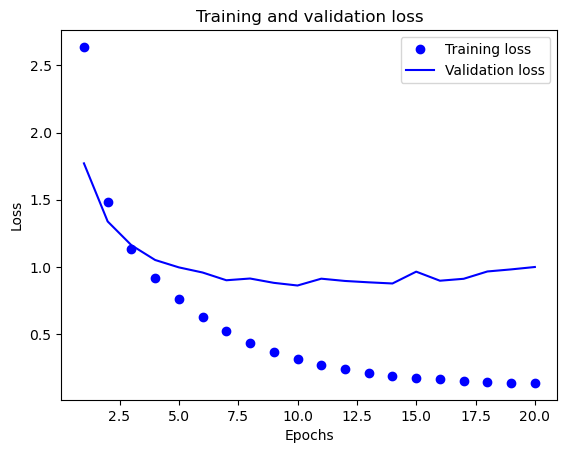

In [46]:
# prog 3.19
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+ 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


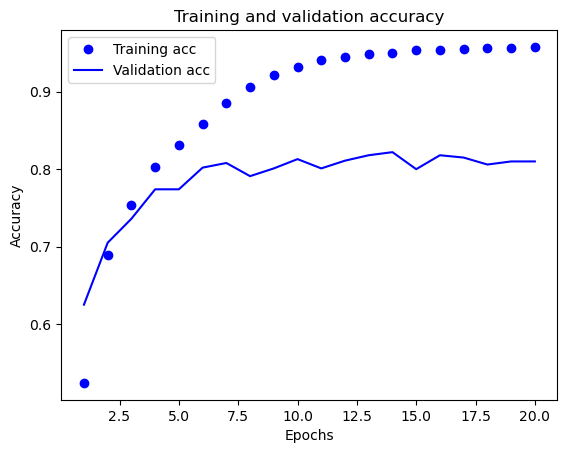

In [49]:
# prog 3.20
plt.clf()  #先清除畫面

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [50]:
# prog 3.21
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
partial_y_train,
epochs=9,  #9 個週期就好!!!
batch_size=512,
validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 27ms/step - loss: 2.7598 - accuracy: 0.5024 - val_loss: 1.8581 - val_accuracy: 0.6140
Epoch 2/9
16/16 [==============================] - 0s 13ms/step - loss: 1.5485 - accuracy: 0.6756 - val_loss: 1.3679 - val_accuracy: 0.6900
Epoch 3/9
16/16 [==============================] - 0s 20ms/step - loss: 1.1702 - accuracy: 0.7440 - val_loss: 1.1721 - val_accuracy: 0.7330
Epoch 4/9
16/16 [==============================] - 0s 28ms/step - loss: 0.9518 - accuracy: 0.7909 - val_loss: 1.0514 - val_accuracy: 0.7660
Epoch 5/9
16/16 [==============================] - 0s 24ms/step - loss: 0.7880 - accuracy: 0.8292 - val_loss: 0.9901 - val_accuracy: 0.7720
Epoch 6/9
16/16 [==============================] - 1s 34ms/step - loss: 0.6586 - accuracy: 0.8567 - val_loss: 0.9427 - val_accuracy: 0.7940
Epoch 7/9
16/16 [==============================] - 0s 17ms/step - loss: 0.5531 - accuracy: 0.8824 - val_loss: 0.8952 - val_accuracy: 0.8090
Epoch 8/9
16/16 [===

In [52]:
results

[0.9357755780220032, 0.784060537815094]